In [1]:
# housing prices ml project

In [2]:
import pandas as pd
import os

# Get the data 

In [3]:
import os
os.chdir('D:\Kashishkashyap\housing ml project')


In [4]:
os.getcwd()

'D:\\Kashishkashyap\\housing ml project'

In [5]:
housing_data=pd.read_csv('housing.csv')
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Explore the data

In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<AxesSubplot:>

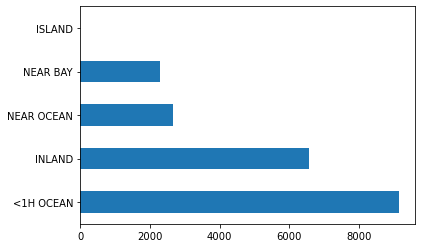

In [7]:
housing_data["ocean_proximity"].value_counts().plot(kind="barh")

In [8]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:>

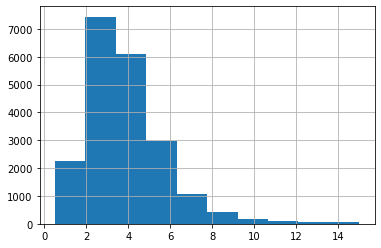

In [9]:
housing_data["median_income"].hist()

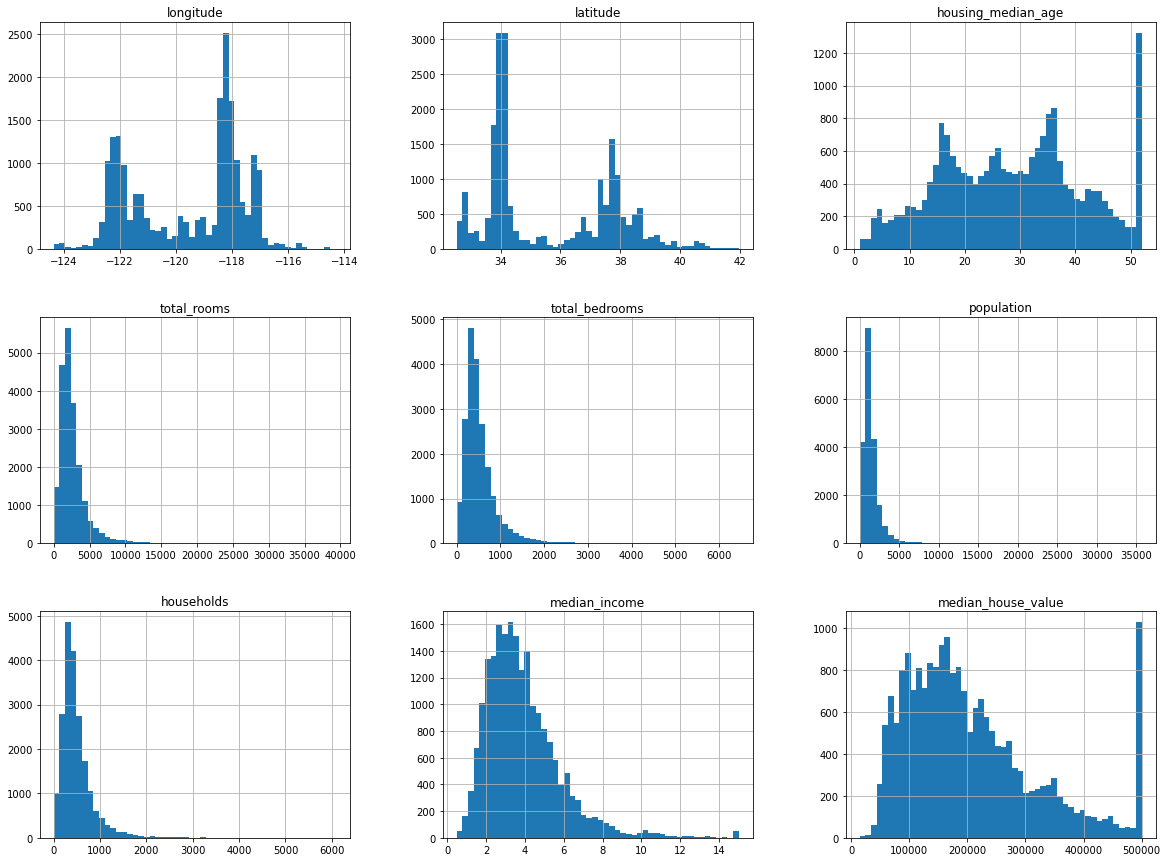

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_data.hist(bins=50,figsize=(20,15))
plt.show()

# Creating a Test set

In [11]:
import numpy as np

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing_data, test_size=0.2,random_state=42)

In [13]:
# stratified sampling

In [14]:
housing_data["income_cat"]=np.ceil(housing_data["median_income"]/1.5)
housing_data["income_cat"].where(housing_data["income_cat"]<5,5.0,inplace=True)

<AxesSubplot:>

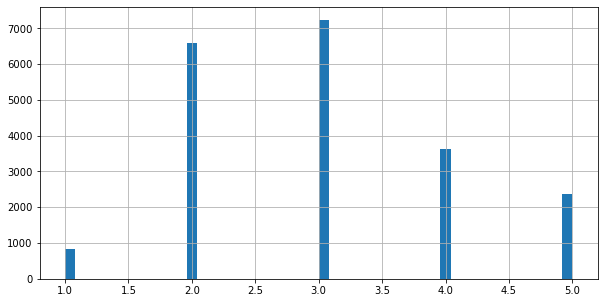

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_data["income_cat"].hist(bins=50,figsize=(10,5))


In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split= StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing_data,housing_data["income_cat"]):
    strat_train_set=housing_data.loc[train_index]
    strat_test_set=housing_data.loc[test_index]

In [17]:
housing_data["income_cat"].value_counts()/len(housing_data)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [18]:
for set_ in(strat_train_set, strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

# Data Visualization

In [19]:
housing_data= strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

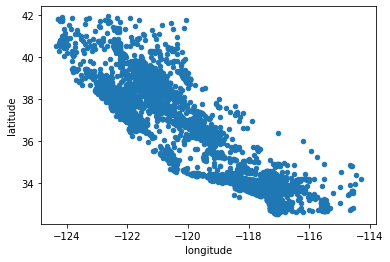

In [20]:
housing_data.plot(kind="scatter",x="longitude",y="latitude")

In [21]:
# this looks like california

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

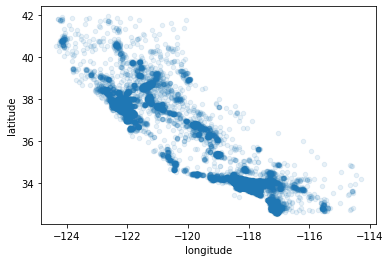

In [22]:
housing_data.plot(kind="scatter",x="longitude",y="latitude", alpha=0.1)

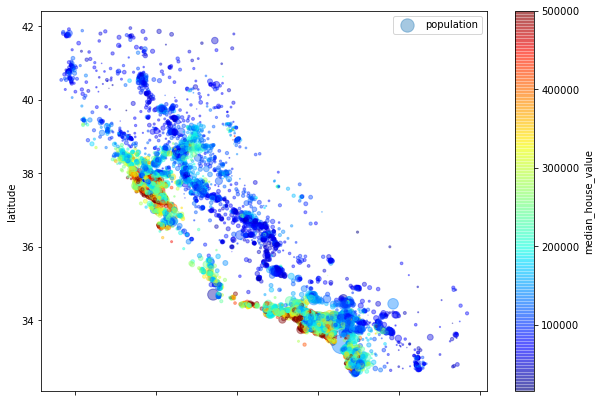

In [23]:
housing_data.plot(kind="scatter", x="longitude",y="latitude",alpha=0.4,
s=housing_data["population"]/100,label="population",figsize=(10,7),
c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,
)
plt.legend()

# Looking for correlations

In [24]:
corr_matrix=housing_data.corr()

In [25]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

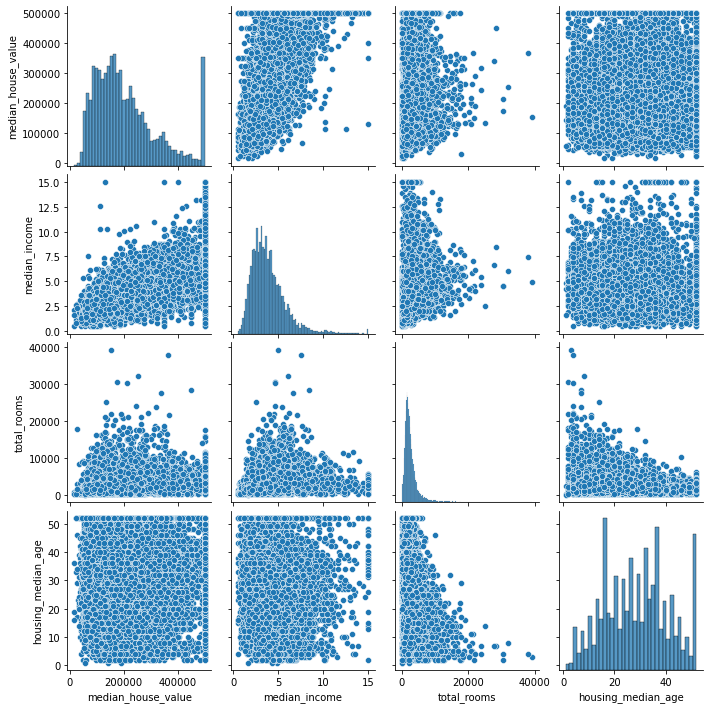

In [26]:
import seaborn as sns
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
sns.pairplot(housing_data[attributes])

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

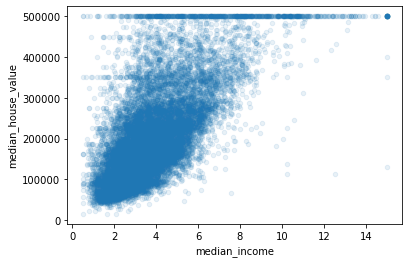

In [27]:
housing_data.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

In [28]:
# median income is the most promising attribute to predict median house value

# Experimenting with Attribute Combinations

In [29]:
#lets make some new columns

In [30]:
housing_data["rooms_per_household"]=housing_data["total_rooms"]/housing_data["households"]
housing_data["bedrooms_per_room"]=housing_data["total_bedrooms"]/housing_data["total_rooms"]
housing_data["population_per_household"]=housing_data["population"]/housing_data["households"]

In [31]:
corr_matrix=housing_data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# Prepare data for ml algorithms

In [32]:
housing_data=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

# feature engineering:creating new features out of our raw data using domain knowledge
# imputation:inserting values where they might be missing to have a complete dataset
# encoding categorical variables: transforming categorical values into some numerical variation
# scaling:applying a scaler that transforms all our data on the same numerical scale


# Data Cleaning

In [33]:
#total_bedrooms column has some missing values

In [34]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

In [35]:
housing_num=housing_data.drop("ocean_proximity",axis=1)

In [36]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [38]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [39]:
imputer.transform(housing_num)

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [40]:
X=imputer.transform(housing_num)
housing_tr=pd.DataFrame(X,columns=housing_num.columns)

# Handling text and categorical attributes

In [41]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
housing_cat=housing_data["ocean_proximity"]
housing_cat_encoded=encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [42]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [43]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
housing_cat_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [44]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

# Custom Transformers

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix,bedrooms_ix,population_ix,household_ix=3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household=X[:,rooms_ix]/X[:,household_ix]
        population_per_household=X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c[X,rooms_per_household,population_per_household]
attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(housing_data.values)

AttributeError: module 'numpy' has no attribute 'c'